In [45]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

# logging.basicConfig(format='%(message)s', level=logging.INFO)
logging.basicConfig(filename='simulation_statistics.log', level=logging.INFO, format='%(message)s')

In [46]:
create_experiment_snapshots([25, 50, 75, 100])

In [47]:
evaluation = execute_simulation(start_time=0, finish_time=3000, mtd_interval=200, scheme='random', total_nodes=100)

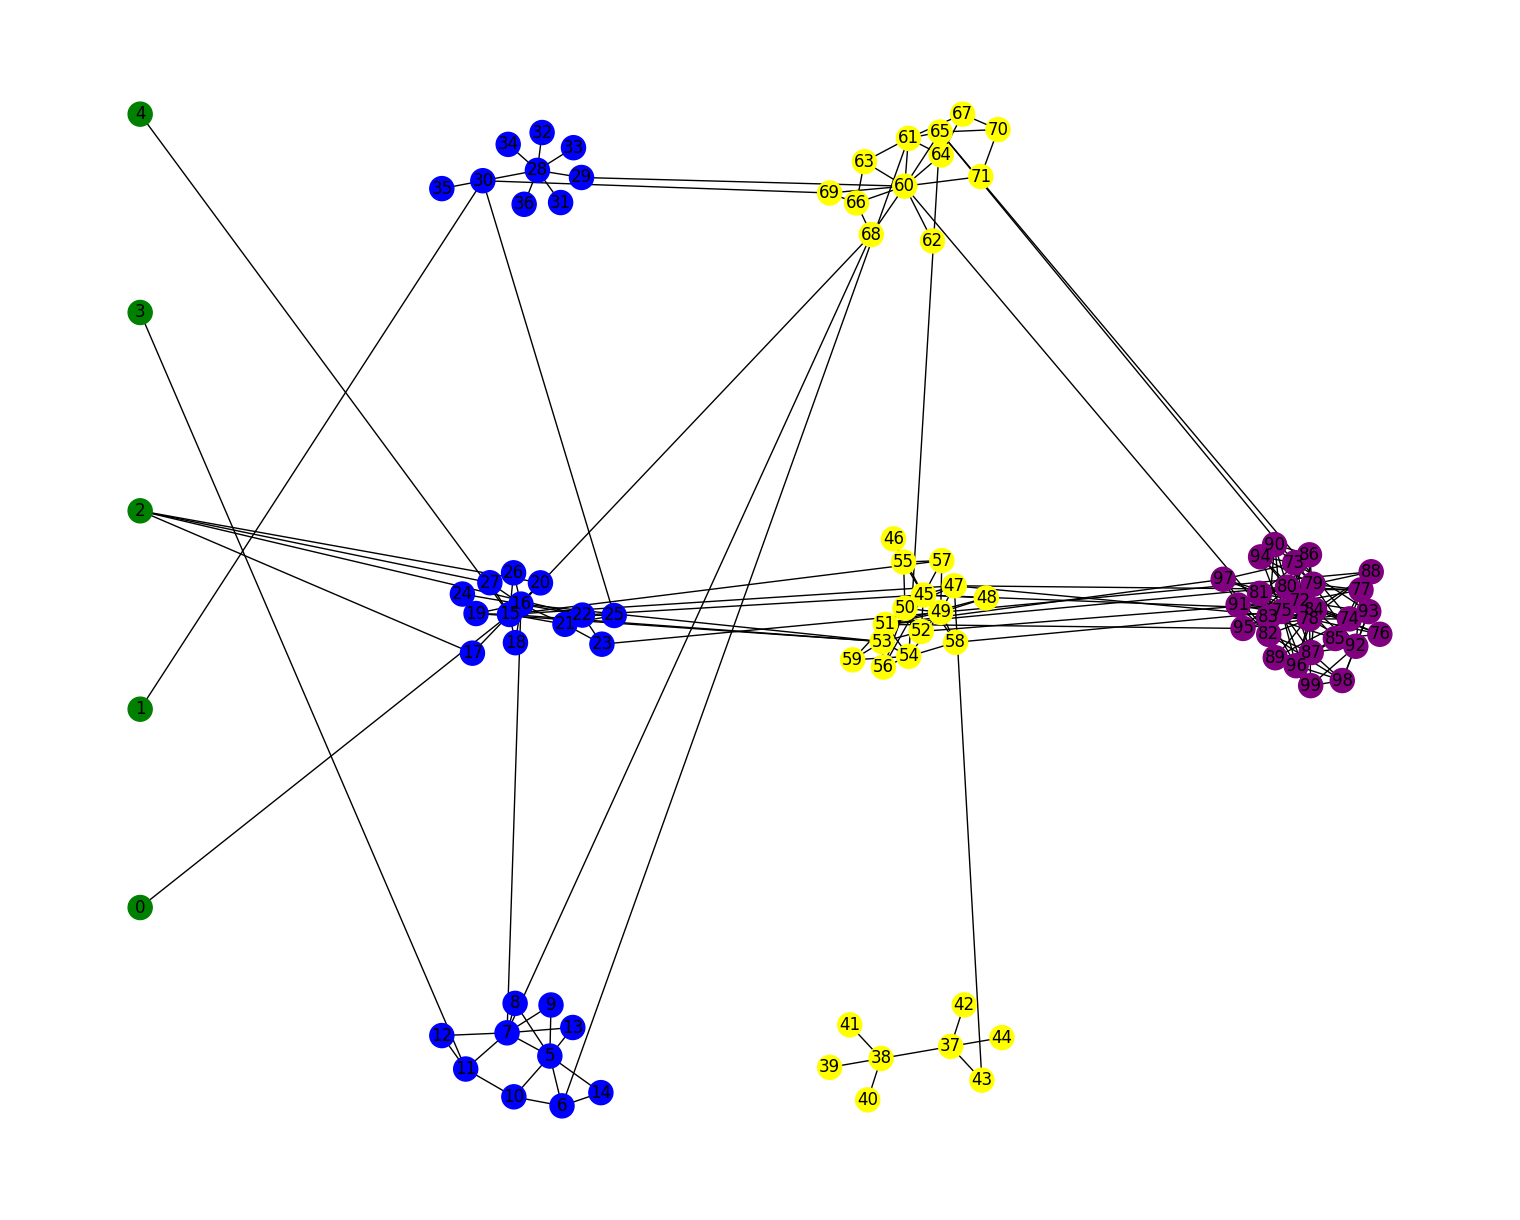

In [48]:
evaluation.get_network().draw()
plt.show()

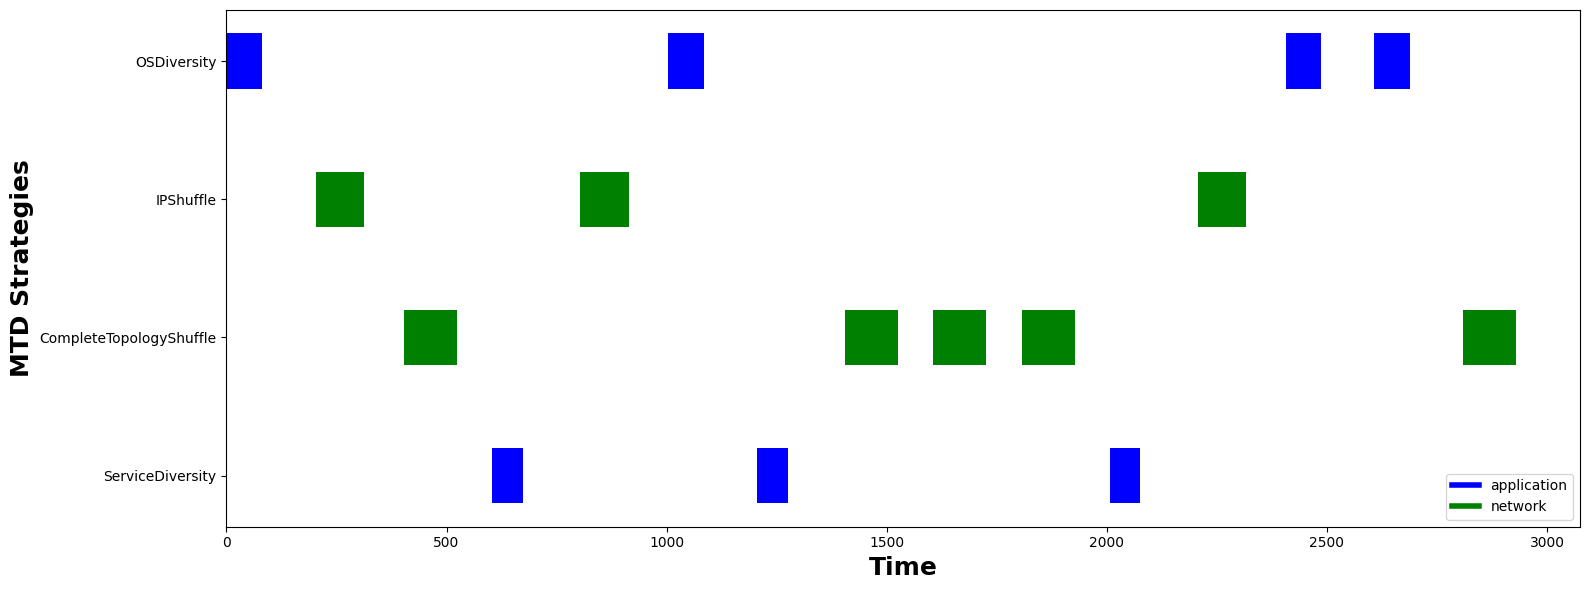

In [49]:
evaluation.visualise_mtd_operation()

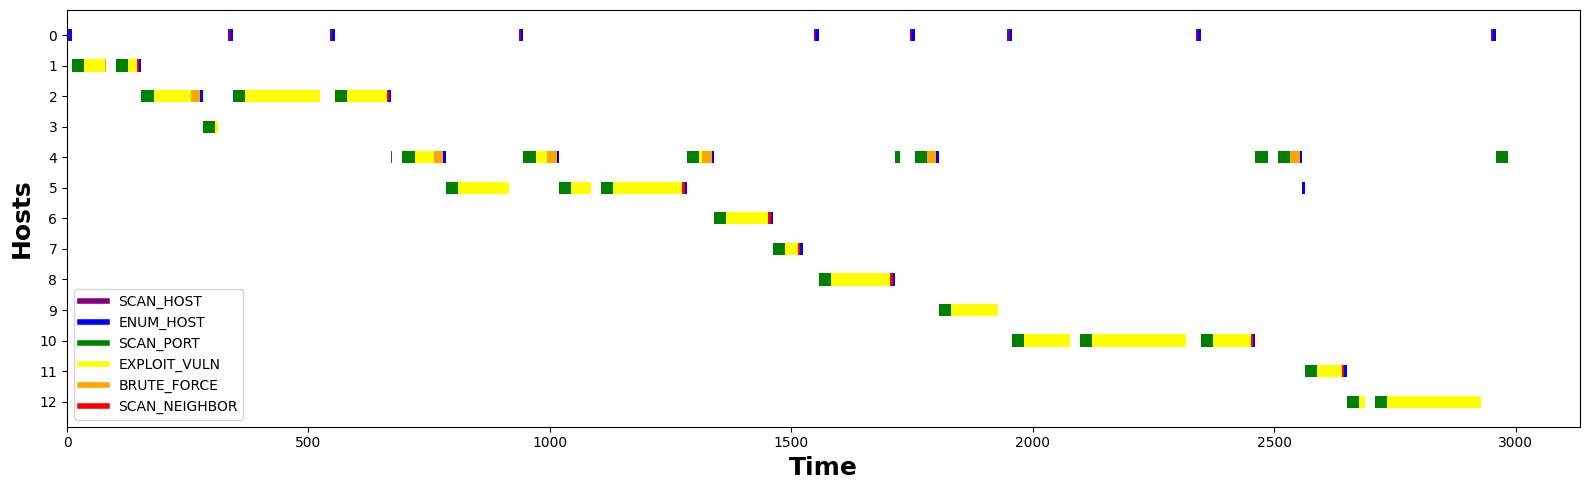

In [50]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  8


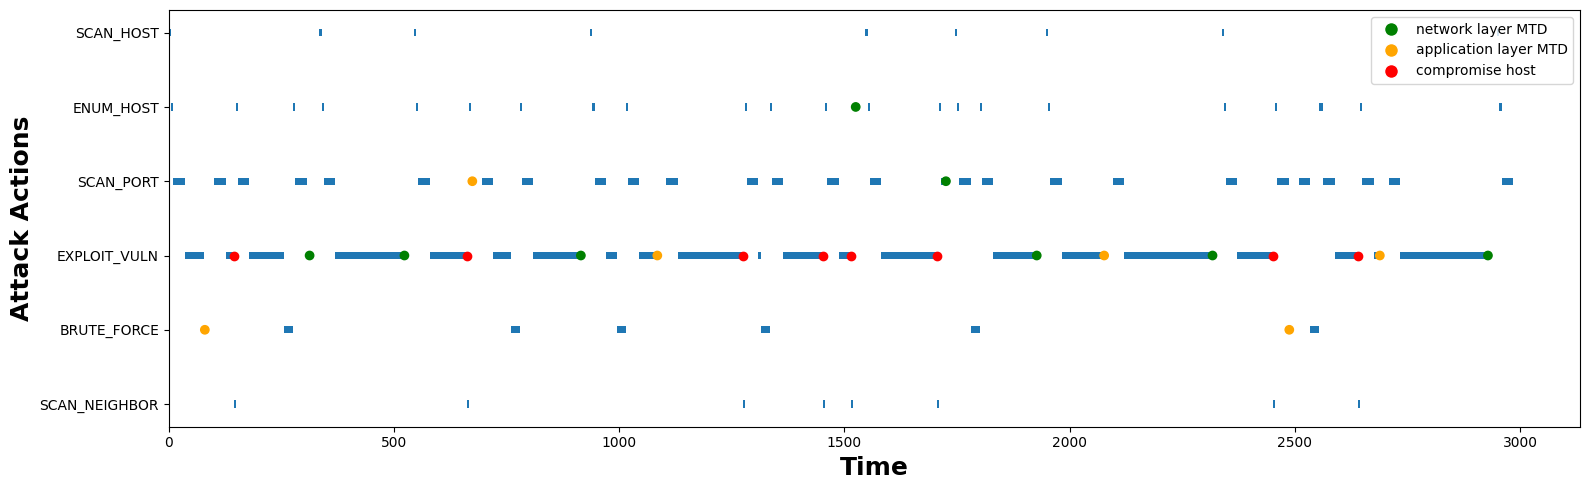

In [51]:
evaluation.visualise_attack_operation()

In [52]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
18,EXPLOIT_VULN,140.663313,144.169740,3.506426,0,c64793e1-21c4-4455-9b38-5551fbf709ef,0,c64793e1-21c4-4455-9b38-5551fbf709ef,1,13,0,"[Riane, Jacinta, Petronilla, Jocelyne]",None,None,yellow,1
82,EXPLOIT_VULN,656.017657,661.785171,5.767514,29,7e1ac3b5-7352-4c56-886d-784509d87107,29,7e1ac3b5-7352-4c56-886d-784509d87107,3,63,1,"[Annabal, Bettine, Annette, Theadora]",None,None,yellow,2
151,EXPLOIT_VULN,1269.504684,1273.730335,4.225651,24,284ab2d3-e08d-46b1-9bec-af21389957f0,24,284ab2d3-e08d-46b1-9bec-af21389957f0,2,116,2,"[Miquela, Zulema, Danell, Allyce]",None,None,yellow,5
169,EXPLOIT_VULN,1446.458719,1452.331029,5.872310,26,fce7e5a7-2b44-493c-87f9-0208ae229824,26,fce7e5a7-2b44-493c-87f9-0208ae229824,1,128,3,"[Mira, Audie, Vivianna, Netta, Jenica]",None,None,yellow,6
177,EXPLOIT_VULN,1507.416913,1513.660603,6.243690,32,7182cf35-c3fb-403d-9ffa-5473239d1ec0,32,7182cf35-c3fb-403d-9ffa-5473239d1ec0,1,133,4,"[Antonietta, Emera, Tansy, Gertie, Josephine]",None,None,yellow,7
199,EXPLOIT_VULN,1683.324641,1704.746663,21.422022,30,cfa1a6e2-6d5c-4637-b6d4-8c75a1a7c811,30,cfa1a6e2-6d5c-4637-b6d4-8c75a1a7c811,1,149,5,"[Carole, Susi, Silva, Wendi]",None,None,yellow,8
280,EXPLOIT_VULN,2435.650526,2450.824946,15.174420,28,a994f176-5760-47ea-8b12-4280052876f2,28,a994f176-5760-47ea-8b12-4280052876f2,2,211,6,"[Alfy, Josey, Ester, Tobye]",None,None,yellow,10
295,EXPLOIT_VULN,2624.145851,2639.687564,15.541713,59,76ac1eae-b20d-46ac-a18b-2c6c2a020476,59,76ac1eae-b20d-46ac-a18b-2c6c2a020476,1,217,7,"[Anna-Diane, Octavia, Ami, Chrissy]",None,None,yellow,11


In [53]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [54]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
18,EXPLOIT_VULN,140.663313,144.169740,3.506426,0,c64793e1-21c4-4455-9b38-5551fbf709ef,0,c64793e1-21c4-4455-9b38-5551fbf709ef,1,13,0,"[Riane, Jacinta, Petronilla, Jocelyne]",None,None,yellow,1
82,EXPLOIT_VULN,656.017657,661.785171,5.767514,29,7e1ac3b5-7352-4c56-886d-784509d87107,29,7e1ac3b5-7352-4c56-886d-784509d87107,3,63,1,"[Annabal, Bettine, Annette, Theadora]",None,None,yellow,2
151,EXPLOIT_VULN,1269.504684,1273.730335,4.225651,24,284ab2d3-e08d-46b1-9bec-af21389957f0,24,284ab2d3-e08d-46b1-9bec-af21389957f0,2,116,2,"[Miquela, Zulema, Danell, Allyce]",None,None,yellow,5
169,EXPLOIT_VULN,1446.458719,1452.331029,5.872310,26,fce7e5a7-2b44-493c-87f9-0208ae229824,26,fce7e5a7-2b44-493c-87f9-0208ae229824,1,128,3,"[Mira, Audie, Vivianna, Netta, Jenica]",None,None,yellow,6
177,EXPLOIT_VULN,1507.416913,1513.660603,6.243690,32,7182cf35-c3fb-403d-9ffa-5473239d1ec0,32,7182cf35-c3fb-403d-9ffa-5473239d1ec0,1,133,4,"[Antonietta, Emera, Tansy, Gertie, Josephine]",None,None,yellow,7
199,EXPLOIT_VULN,1683.324641,1704.746663,21.422022,30,cfa1a6e2-6d5c-4637-b6d4-8c75a1a7c811,30,cfa1a6e2-6d5c-4637-b6d4-8c75a1a7c811,1,149,5,"[Carole, Susi, Silva, Wendi]",None,None,yellow,8
280,EXPLOIT_VULN,2435.650526,2450.824946,15.174420,28,a994f176-5760-47ea-8b12-4280052876f2,28,a994f176-5760-47ea-8b12-4280052876f2,2,211,6,"[Alfy, Josey, Ester, Tobye]",None,None,yellow,10
295,EXPLOIT_VULN,2624.145851,2639.687564,15.541713,59,76ac1eae-b20d-46ac-a18b-2c6c2a020476,59,76ac1eae-b20d-46ac-a18b-2c6c2a020476,1,217,7,"[Anna-Diane, Octavia, Ami, Chrissy]",None,None,yellow,11


In [55]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [56]:
evaluation.evaluation_result_by_compromise_checkpoint()

[]

In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

class Feature:

    def __init__(self, df) -> None:
        # Example parameter for encoding
        self.df, label_encoders = self.encode_text_to_integers(df, ["name", "executed_at", "color"])
        # self.df, scaler = self.normalize_dataframe(self.df)
        
    def normalize_dataframe(self, df, scaler_type='minmax'):
        # Select only numerical columns for normalization
        numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

        # Exclude columns that were encoded
        encoded_columns = ["name", "executed_at", "color"]
        numerical_columns = [col for col in numerical_columns if col not in encoded_columns]

        if scaler_type == 'minmax':
            scaler = MinMaxScaler()  # Create MinMaxScaler object
        elif scaler_type == 'standard':
            scaler = StandardScaler()  # Create StandardScaler object
        else:
            raise ValueError("Invalid scaler_type. Must be 'minmax' or 'standard'.")

        normalized_data = scaler.fit_transform(df[numerical_columns])  # Fit and transform numerical columns
        df[numerical_columns] = normalized_data  # Update DataFrame with normalized data
        
        return df, scaler

    def encode_text_to_integers(self, df, columns):
        encoded_df = df.copy()  # Create a copy of the DataFrame
        label_encoders = {}  # Dictionary to store LabelEncoders for each column
        
        for column in columns:
            label_encoder = LabelEncoder()  # Create a LabelEncoder for the column
            encoded_df[column] = label_encoder.fit_transform(encoded_df[column])  # Encode the column to integers
            label_encoders[column] = label_encoder  # Store the LabelEncoder
            
        return encoded_df, label_encoders


In [58]:
evaluation._mtd_record

,name,start_time,finish_time,duration,executed_at,color
0,OSDiversity,0.000000,80.038571,80.038571,application,blue
1,IPShuffle,202.500001,312.617618,110.117617,network,green
2,CompleteTopologyShuffle,403.007223,523.100637,120.093414,network,green
3,ServiceDiversity,603.632483,673.870224,70.237741,application,blue
4,IPShuffle,803.663101,914.848817,111.185716,network,green
5,OSDiversity,1004.032453,1084.578121,80.545669,application,blue
6,ServiceDiversity,1204.557929,1275.145980,70.588050,application,blue
7,CompleteTopologyShuffle,1404.963210,1524.970033,120.006823,network,green
8,CompleteTopologyShuffle,1605.207962,1725.262827,120.054865,network,green
9,CompleteTopologyShuffle,1806.239396,1926.841596,120.602200,network,green


In [59]:
features = Feature(evaluation._mtd_record)

In [60]:
import seaborn as sns

In [61]:
features.df

,name,start_time,finish_time,duration,executed_at,color
0,2,0.000000,80.038571,80.038571,0,0
1,1,202.500001,312.617618,110.117617,1,1
2,0,403.007223,523.100637,120.093414,1,1
3,3,603.632483,673.870224,70.237741,0,0
4,1,803.663101,914.848817,111.185716,1,1
5,2,1004.032453,1084.578121,80.545669,0,0
6,3,1204.557929,1275.145980,70.588050,0,0
7,0,1404.963210,1524.970033,120.006823,1,1
8,0,1605.207962,1725.262827,120.054865,1,1
9,0,1806.239396,1926.841596,120.602200,1,1


In [62]:
features.df.corr()

,name,start_time,finish_time,duration,executed_at,color
name,1.000000,-0.095170,-0.118455,-0.977685,-0.902412,-0.902412
start_time,-0.095170,1.000000,0.999714,0.051475,0.000137,0.000137
finish_time,-0.118455,0.999714,1.000000,0.075361,0.023444,0.023444
duration,-0.977685,0.051475,0.075361,1.000000,0.972558,0.972558
executed_at,-0.902412,0.000137,0.023444,0.972558,1.000000,1.000000
color,-0.902412,0.000137,0.023444,0.972558,1.000000,1.000000


<Axes: >

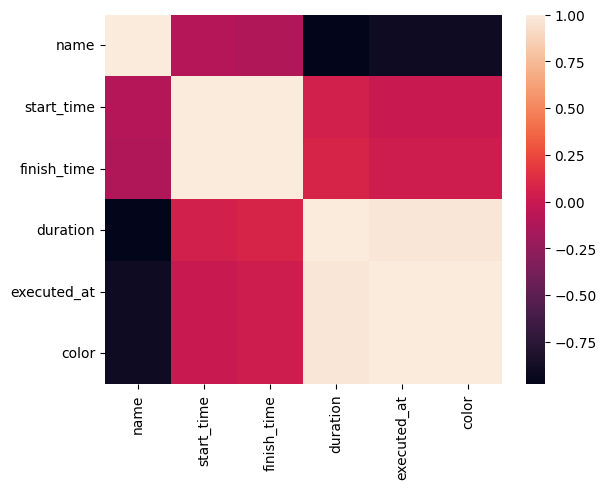

In [63]:
sns.heatmap(features.df.corr())

In [64]:
evaluation._attack_record

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
0,SCAN_HOST,0.000000,5.000000,5.000000,-1,-1,None,None,0,0,0,[],None,None,purple,0
1,ENUM_HOST,5.000000,10.000000,5.000000,-1,-1,None,None,0,0,0,[],None,None,blue,0
2,SCAN_PORT,10.000000,35.000000,25.000000,0,c64793e1-21c4-4455-9b38-5551fbf709ef,None,None,1,0,0,[],None,None,green,1
3,EXPLOIT_VULN,35.000000,38.396386,3.396386,0,c64793e1-21c4-4455-9b38-5551fbf709ef,None,None,1,0,0,[],None,None,yellow,1
4,EXPLOIT_VULN,38.396386,45.372311,6.975925,0,c64793e1-21c4-4455-9b38-5551fbf709ef,None,None,1,1,0,[],None,None,yellow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,EXPLOIT_VULN,2920.396448,2925.262262,4.865814,57,cc4d7029-c071-472a-b9f6-b5a393022316,None,None,1,244,8,[],None,None,yellow,12
328,EXPLOIT_VULN,2925.262262,2928.512903,3.250640,57,cc4d7029-c071-472a-b9f6-b5a393022316,None,None,1,245,8,[],network,CompleteTopologyShuffle,yellow,12
329,SCAN_HOST,2948.698532,2953.698532,5.000000,-1,-1,None,None,0,245,8,[],None,None,purple,0
330,ENUM_HOST,2953.698532,2958.698532,5.000000,-1,-1,None,None,0,245,8,[],None,None,blue,0


In [65]:
evaluation._attack_record[['name', 'start_time', 'finish_time', 'duration', 'compromise_host',"compromise_host_uuid"]][evaluation._attack_record['compromise_host'] != "None"]

,name,start_time,finish_time,duration,compromise_host,compromise_host_uuid
18,EXPLOIT_VULN,140.663313,144.169740,3.506426,0,c64793e1-21c4-4455-9b38-5551fbf709ef
82,EXPLOIT_VULN,656.017657,661.785171,5.767514,29,7e1ac3b5-7352-4c56-886d-784509d87107
151,EXPLOIT_VULN,1269.504684,1273.730335,4.225651,24,284ab2d3-e08d-46b1-9bec-af21389957f0
169,EXPLOIT_VULN,1446.458719,1452.331029,5.872310,26,fce7e5a7-2b44-493c-87f9-0208ae229824
177,EXPLOIT_VULN,1507.416913,1513.660603,6.243690,32,7182cf35-c3fb-403d-9ffa-5473239d1ec0
199,EXPLOIT_VULN,1683.324641,1704.746663,21.422022,30,cfa1a6e2-6d5c-4637-b6d4-8c75a1a7c811
280,EXPLOIT_VULN,2435.650526,2450.824946,15.174420,28,a994f176-5760-47ea-8b12-4280052876f2
295,EXPLOIT_VULN,2624.145851,2639.687564,15.541713,59,76ac1eae-b20d-46ac-a18b-2c6c2a020476


In [66]:
evaluation._attack_record.columns

Index(['name', 'start_time', 'finish_time', 'duration', 'current_host',
       'current_host_uuid', 'compromise_host', 'compromise_host_uuid',
       'current_host_attempt', 'cumulative_attempts',
       'cumulative_compromised_hosts', 'compromise_users', 'interrupted_in',
       'interrupted_by', 'color', 'curr_host_token'],
      dtype='object')